In [16]:
import matplotlib.pyplot as plt

In [40]:
import glob
import yaml
import numpy as np
from scipy import optimize
from typing import Callable, Optional, Tuple

def plot(
    src_dir: str,
    y_label: str,
    x_label: str,
    y_key: Optional[str] = None,
    x_key: Optional[str] = None,
    title: Optional[str] = None,
    fit_func: Optional[Callable] = None,
    y_lim: Optional[Tuple[float, float]] = None,
    export_path: Optional[str] = None
) -> None:
    yamls = glob.glob(f"{src_dir}/**/*.yaml", recursive=True)
    
    x = []
    y = []
    x_key_ = x_key or x_label
    y_key_ = y_key or y_label
    for yaml_path in yamls:
        with open(yaml_path, 'r') as f:
            result = yaml.safe_load(f)
            x.append(result[x_key_])
            y.append(result[y_key_])
    
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Plot scatter
    if y_lim:
        ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.plot(x, y, marker='+', markersize=6, linestyle='', color='gray')
    fig.set_size_inches(5, 5)
    
    # Fitting
    if fit_func:
        x = np.array(x)
        popt, _ = optimize.curve_fit(fit_func, x, y)
        fit_y = fit_func(x, *popt)
        ax.plot(x, fit_y, color='#1a2128', label='Fitting curve')
    
    ax.legend(fontsize=14, loc='lower right')
    if title:
        ax.set_title(title)

    if export_path:
        fig.tight_layout()
        fig.savefig(export_path)
    plt.show()

In [22]:
def liner_fit_func(x, a, b):
    return a + b*x

def quadratic_fit_func(X, a, b, c):
    return a + b*X + c*(X**2)

# Algorithm 1 & 2

In [8]:
x_label_choice_for_alg12 = {
    'Number of nodes',
    'Number of edges',
    'Number of timer driven nodes',
    'Number of join nodes',
    'Number of tail nodes',
    'Number of tail and join node pairs'
}

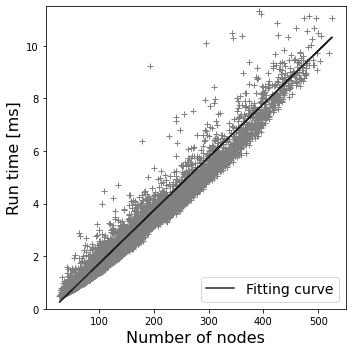

In [66]:
### Run time

plot(
    src_dir='./results/run_time/alg12/',
    y_label='Run time [ms]',
    x_label='Number of nodes',
    # title='Run time of Algorithm 1 and 2',
    fit_func=liner_fit_func,
    y_lim=(0, 11.5),
    export_path='./results/figures/alg12/run_time/alg12_run_time.pdf'
)

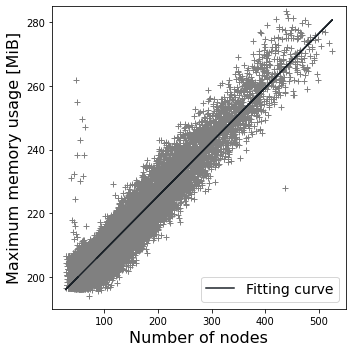

In [28]:
### Maximum memory usage

plot(
    src_dir='./results/memory_usage/alg12_20221124/',
    y_label='Maximum memory usage [MiB]',
    x_label='Number of nodes',
    # title='Maximum memory usage of Algorithm 1 and 2',
    fit_func=liner_fit_func,
    y_lim=(190, 285),
    export_path='./results/figures/alg12/memory_usage/alg12_memory_usage.pdf'
)

# Algorithm 3

In [68]:
x_label_choice_for_alg3 = {
    'Number of nodes',
    'Number of edges',
    'Number of timer driven nodes',
    'Number of join nodes',
    'Number of tail nodes',
    'Number of sub DAGs',
    'Number of tail and join node pairs',
    'Number of pairs of tail node jobs and join node jobs',
    'Number of jobs',
    'Number of HP prime factor',
    'E*H^2',
    'Maximum number of jobs per node',
    'E*J^2',
    'HP'
}

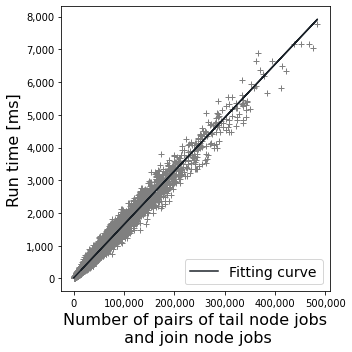

In [67]:
### Run time

plot(
    src_dir='./results/run_time/alg3/',
    y_label='Run time [ms]',
    x_label='Number of pairs of tail node jobs\n and join node jobs',
    x_key='Number of pairs of tail node jobs and join node jobs',
    # title='Run time of Algorithm 3',
    fit_func=liner_fit_func,
    export_path='./results/figures/alg3/run_time/alg3_run_time.pdf'
)

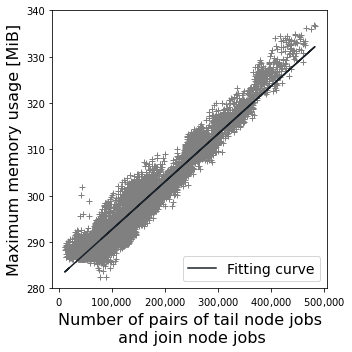

In [41]:
### Maximum memory usage

plot(
    src_dir='./results/memory_usage/alg3/',
    y_label='Maximum memory usage [MiB]',
    x_label='Number of pairs of tail node jobs\n and join node jobs',
    x_key='E*H^2',
    # title='Maximum memory usage of Algorithm 3',
    fit_func=liner_fit_func,
    y_lim=(280, 340),
    export_path='./results/figures/alg3/memory_usage/alg3_memory_usage.pdf'
)

# All

In [31]:
### Run time

yamls = glob.glob(f"./results/run_time/all/**/*.yaml", recursive=True)

run_time_values = []
for yaml_path in yamls:
    with open(yaml_path, 'r') as f:
        result = yaml.safe_load(f)
        run_time = result['Run time [ms]']
        run_time_values.append(run_time)

run_time_values = sorted(run_time_values)[:-9]
sum = 0
for run_time in run_time_values:
    sum += run_time

print(f'min: {min(run_time_values)},\n ave: {sum/len(run_time_values)},\n max: {max(run_time_values)}')
# from pprint import pprint
# pprint(sorted(run_time_values)[-10:])

min: 15.234299993608147,
 ave: 11605.829741504429,
 max: 909214.0856999904


In [45]:
### Maximum memory usage

yamls = glob.glob(f"./results/memory_usage/alg3/**/*.yaml", recursive=True)

memory_usage_values = []
for yaml_path in yamls:
    with open(yaml_path, 'r') as f:
        result = yaml.safe_load(f)
        memory_usage = result['Maximum memory usage [MiB]']
        memory_usage_values.append(memory_usage)

# memory_usage_values = sorted(memory_usage_values)[:-9]
sum = 0
for memory_usage in memory_usage_values:
    sum += memory_usage

print(f'min: {min(memory_usage_values)},\n ave: {sum/len(memory_usage_values)},\n max: {max(memory_usage_values)}')
# from pprint import pprint
# pprint(sorted(memory_usage_values)[-10:])

min: 231.9921875,
 ave: 295.68419337699515,
 max: 336.84375
